# Simple Convolutional Autoencoder : MNIST dataset

Using TensorFlow backend.


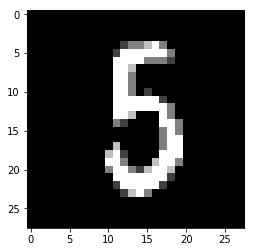

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[5678],cmap='gray')
Xme=X_train

In [2]:
from keras.utils import to_categorical
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#noisy=noisy.reshape(60000,28,28,1)
print(y_train[0])
print(X_train.shape)
#print(noisy.shape)
print(X_test.shape)
print(y_test.shape)
X_train= X_train.astype('float32')
X_train /= 255.

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 10)


In [11]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dropout, GlobalAveragePooling2D,Reshape
from keras.layers import Flatten, Dense,UpSampling2D

model = Sequential()

#Encoder
model.add(Convolution2D(32, (2, 2), input_shape=(28,28,1),activation='relu', padding="same"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.2))

model.add(Convolution2D(16, (2, 2),activation='relu', padding="same"))
model.add(MaxPooling2D(2))
model.add(Dropout(0.1))

#model.add(Convolution2D(8, (2, 2),activation='relu', padding="same"))
#model.add(MaxPooling2D(2)
#model.add(Dropout(0.2))

#model.add(Convolution2D(16, (2, 2),activation='relu', padding="same"))
#model.add(MaxPooling2D(2))
#model.add(Dropout(0.2))

#Decoder

#model.add(UpSampling2D(size=(7,7)))
#model.add(Convolution2D(8, (2, 2),activation='relu', padding="same"))
#model.add(Dropout(0.1))

model.add(UpSampling2D(size=(2,2)))
model.add(Convolution2D(32,(2, 2),activation='relu', padding="same"))
model.add(Dropout(0.1))

model.add(UpSampling2D(size=(2,2)))
model.add(Convolution2D(64, (2, 2),activation='relu', padding="same"))
model.add(Dropout(0.1))

#model.add(Convolution2D(8, (2, 2),activation='relu', padding="same"))
#model.add(Dropout(0.2))
#model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 14, 14, 16)        0         
__________

In [12]:
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
X=np.reshape(X_train,[60000,28,28,1])
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
hist = model.fit(X_train,X_train, validation_split = 0.2, epochs = 5, batch_size=256, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 416s 9ms/step - loss: 0.2612 - acc: 0.7978 - val_loss: 0.1461 - val_acc: 0.8036
Epoch 2/5
48000/48000 [==============================] - 404s 8ms/step - loss: 0.1468 - acc: 0.8024 - val_loss: 0.1209 - val_acc: 0.8092
Epoch 3/5
48000/48000 [==============================] - 401s 8ms/step - loss: 0.1279 - acc: 0.8073 - val_loss: 0.1089 - val_acc: 0.8115
Epoch 4/5
48000/48000 [==============================] - 401s 8ms/step - loss: 0.1199 - acc: 0.8090 - val_loss: 0.1027 - val_acc: 0.8128
Epoch 5/5
48000/48000 [==============================] - 405s 8ms/step - loss: 0.1153 - acc: 0.8098 - val_loss: 0.0993 - val_acc: 0.8129


In [14]:
hist = model.fit(X_train,X_train, validation_split = 0.2, epochs = 10, batch_size=128, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 404s 8ms/step - loss: 0.1114 - acc: 0.8105 - val_loss: 0.0950 - val_acc: 0.8136
Epoch 2/10
48000/48000 [==============================] - 422s 9ms/step - loss: 0.1079 - acc: 0.8111 - val_loss: 0.0924 - val_acc: 0.8141
Epoch 3/10
48000/48000 [==============================] - 430s 9ms/step - loss: 0.1056 - acc: 0.8115 - val_loss: 0.0908 - val_acc: 0.8142
Epoch 4/10
48000/48000 [==============================] - 438s 9ms/step - loss: 0.1042 - acc: 0.8117 - val_loss: 0.0897 - val_acc: 0.8144
Epoch 5/10
48000/48000 [==============================] - 460s 10ms/step - loss: 0.1030 - acc: 0.8119 - val_loss: 0.0887 - val_acc: 0.8145
Epoch 6/10
48000/48000 [==============================] - 469s 10ms/step - loss: 0.1022 - acc: 0.8120 - val_loss: 0.0881 - val_acc: 0.8146
Epoch 7/10
48000/48000 [==============================] - 434s 9ms/step - loss: 0.1015 - acc: 0.8121 - val_loss: 0.0875 

In [27]:
hist = model.fit(X_train,X_train, validation_split = 0.2, epochs =10, batch_size=256, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 402s 8ms/step - loss: 0.0992 - acc: 0.8124 - val_loss: 0.0855 - val_acc: 0.8151
Epoch 2/10
48000/48000 [==============================] - 402s 8ms/step - loss: 0.0990 - acc: 0.8124 - val_loss: 0.0854 - val_acc: 0.8149
Epoch 3/10
48000/48000 [==============================] - 408s 8ms/step - loss: 0.0988 - acc: 0.8124 - val_loss: 0.0853 - val_acc: 0.8149
Epoch 4/10
48000/48000 [==============================] - 524s 11ms/step - loss: 0.0986 - acc: 0.8125 - val_loss: 0.0850 - val_acc: 0.8150
Epoch 5/10
48000/48000 [==============================] - 477s 10ms/step - loss: 0.0985 - acc: 0.8125 - val_loss: 0.0849 - val_acc: 0.8150
Epoch 6/10
48000/48000 [==============================] - 452s 9ms/step - loss: 0.0983 - acc: 0.8125 - val_loss: 0.0847 - val_acc: 0.8150
Epoch 7/10
48000/48000 [==============================] - 435s 9ms/step - loss: 0.0982 - acc: 0.8125 - val_loss: 0.0846 

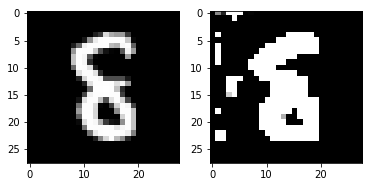

In [32]:
index=232

x1=np.reshape(X_test[index],[1,28,28,1])
y1=model.predict(x1)
y1=np.reshape(y1,[28,28])
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(np.reshape(x1,[28,28]),cmap="gray")
f.add_subplot(1,2, 2)
plt.imshow(y1,cmap="gray")

In [33]:
model.save('model_simple_conv_ae1.h5')

In [6]:
from keras.models import load_model
import tensorflow
from tensorflow.losses import sigmoid_cross_entropy
model = load_model('model_cae.h5')